# <font color ='blue'>Zillow Clustering Project
    
<img src="zillow_logo.png" alt="Zillow Logo" title="Zillow Logo" width="300" height="100" align="right"/>
    
    
# <p style="font-size:50px" align="center">Zestimate Error</p> <sub>By Kaniela Denis and Mason Sherbondy - 7 Jan 2022</sub>

## Project Goal

## Project Description

## Data Dictionary

<hr style="border:2px solid blue"> </hr>

In [1]:
# import pandas and numpy to start coding
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import acquire
import prepare
import explore
import modeling

import warnings
warnings.filterwarnings("ignore")

<hr style="border:2px solid blue"> </hr>

# Wrangle

## Actions Taken:
1. Data aquired from MySQL database and included only 2017 single family home transactions
2. 52K records pulled, included 1.7M nulls
3. Removed rows that have no bedrooms or no bathroms or have too smal an area
4. Removed columns with more than 50% null values and rows with more than 30% null values
5. Dropped all left over nulls as amounts were relatively small
6. Removed outliers that were 1.5 times Interquartile Range above third quartile or below first quartile
7. Dropped columns that couldn't be used or were redundant
8. Renamed columns for readability
9. Created new columns for dimension reduction
10. Split the data into train, test, validate using 56%, 24%, 20% ratio for each set
11. Created scaled columns for exploration, clustering, and modeling

In [2]:
df = acquire.get_zillow()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52319 entries, 0 to 52318
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        76 non-null     float64
 1   storytypeid                   47 non-null     float64
 2   propertylandusetypeid         52319 non-null  float64
 3   heatingorsystemtypeid         33849 non-null  float64
 4   buildingclasstypeid           0 non-null      float64
 5   architecturalstyletypeid      70 non-null     float64
 6   airconditioningtypeid         13615 non-null  float64
 7   parcelid                      52319 non-null  int64  
 8   id                            52319 non-null  int64  
 9   basementsqft                  47 non-null     float64
 10  bathroomcnt                   52319 non-null  float64
 11  bedroomcnt                    52319 non-null  float64
 12  buildingqualitytypeid         33654 non-null  float64
 13  c

In [4]:
df, train, validate, test, train_scaled, validate_scaled, test_scaled = prepare.wrangle(df)

In [5]:
df.shape, train.shape, validate.shape, test.shape

((31456, 26), (17614, 26), (7550, 26), (6292, 26))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31456 entries, 2 to 52318
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bathrooms          31456 non-null  float64
 1   bedrooms           31456 non-null  float64
 2   house_area         31456 non-null  float64
 3   fips               31456 non-null  float64
 4   full_baths         31456 non-null  float64
 5   latitude           31456 non-null  float64
 6   longitude          31456 non-null  float64
 7   lot_area           31456 non-null  float64
 8   land_use_code      31456 non-null  object 
 9   city_id            31456 non-null  float64
 10  county_id          31456 non-null  float64
 11  zip_id             31456 non-null  float64
 12  year_built         31456 non-null  float64
 13  tax_value_house    31456 non-null  float64
 14  tax_value_total    31456 non-null  float64
 15  tax_value_land     31456 non-null  float64
 16  tax_amount         314

<hr style="border:2px solid blue"> </hr>

# Exploratory Data Analysis

In [7]:
for column in df.columns:
    print(f'{df[column].value_counts()}\n ----------')

2.0    15538
1.0     6153
3.0     5816
2.5     2841
1.5      528
4.0      404
3.5      176
Name: bathrooms, dtype: int64
 ----------
3.0    15645
4.0     8746
2.0     5269
5.0     1367
1.0      282
6.0      130
7.0       14
9.0        2
8.0        1
Name: bedrooms, dtype: int64
 ----------
1120.0    98
1200.0    85
1400.0    67
1570.0    65
1176.0    63
          ..
3313.0     1
3304.0     1
3082.0     1
3344.0     1
3071.0     1
Name: house_area, Length: 2685, dtype: int64
 ----------
6037.0    20341
6059.0     9289
6111.0     1826
Name: fips, dtype: int64
 ----------
2.0    18383
1.0     6681
3.0     5989
4.0      403
Name: full_baths, dtype: int64
 ----------
34041200.0    4
34712133.0    4
33770026.0    3
33890570.0    3
33914773.0    3
             ..
34169429.0    1
34261697.0    1
34062366.0    1
34688737.0    1
33957603.0    1
Name: latitude, Length: 30733, dtype: int64
 ----------
-117847000.0    5
-117762000.0    4
-117849000.0    4
-117656000.0    4
-118251000.0    4
       

In [8]:
quant_vars = ['bathrooms', 'bedrooms', 'house_area', 'full_baths', 'lot_area', 'tax_value_house', 'tax_value_total', 'tax_value_land', 'tax_amount', 'age', 'house_dollar_sqft', 'land_dollar_sqft', 'tax_rate', 'bed_bath_ratio']

In [9]:
len(quant_vars)

14

In [10]:
first_corrs = quant_vars[:7] + ['logerror']
second_corrs = quant_vars[7:] + ['logerror']

In [11]:
first_corrs, second_corrs

(['bathrooms',
  'bedrooms',
  'house_area',
  'full_baths',
  'lot_area',
  'tax_value_house',
  'tax_value_total',
  'logerror'],
 ['tax_value_land',
  'tax_amount',
  'age',
  'house_dollar_sqft',
  'land_dollar_sqft',
  'tax_rate',
  'bed_bath_ratio',
  'logerror'])

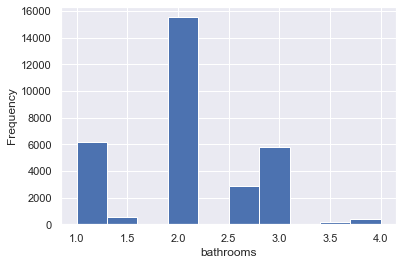

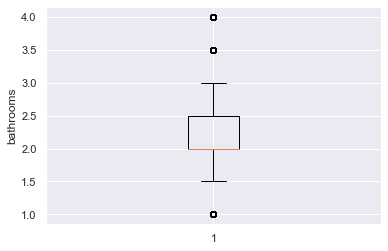

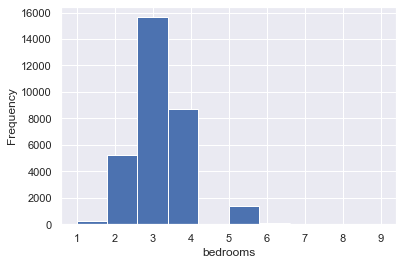

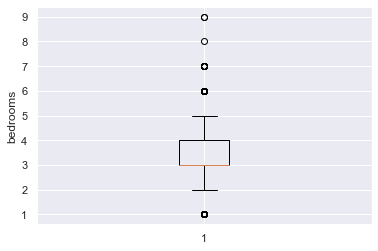

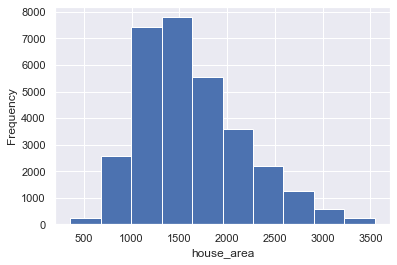

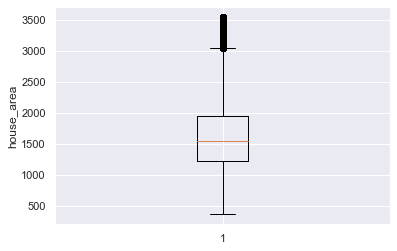

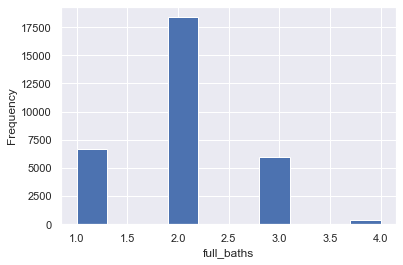

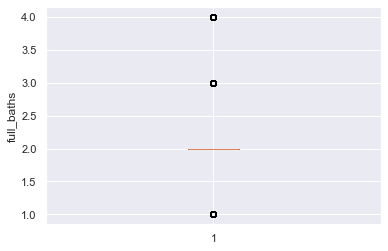

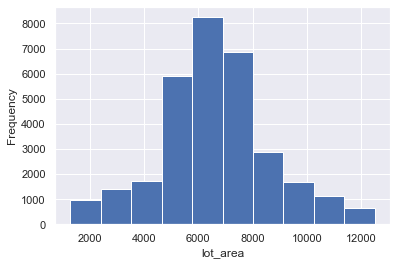

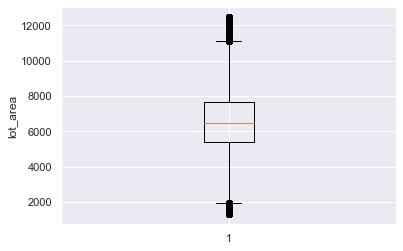

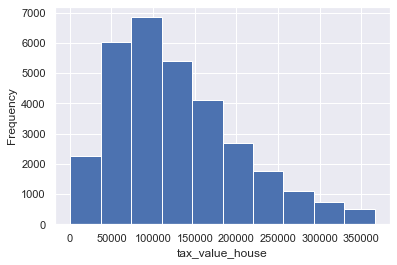

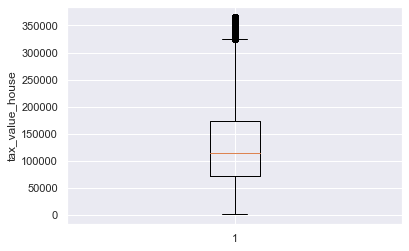

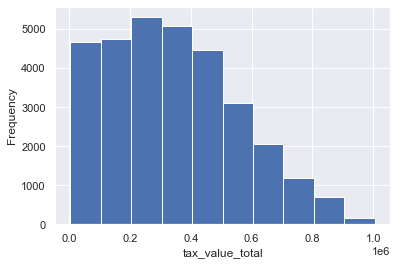

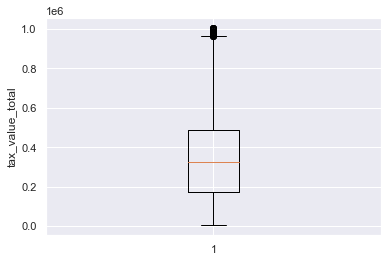

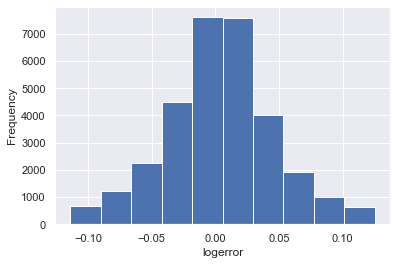

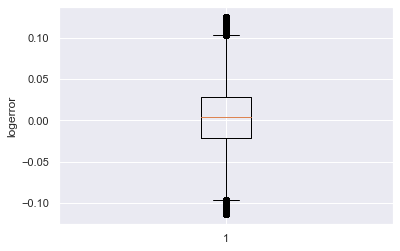

In [12]:
#loop through this list to view distributions of numeric columns
for cat in first_corrs:
    df[cat].hist()
    plt.xlabel(cat)
    plt.ylabel('Frequency')
    plt.show();
    plt.boxplot(df[cat])
    plt.ylabel(cat)
    plt.show();

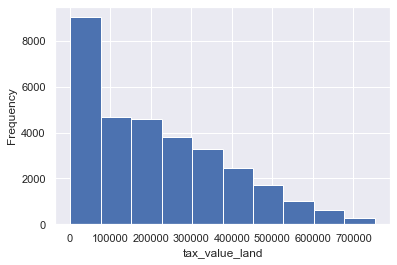

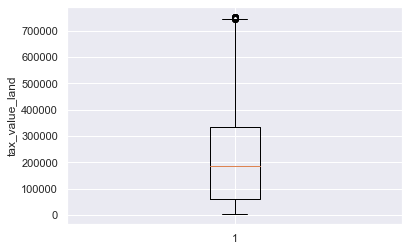

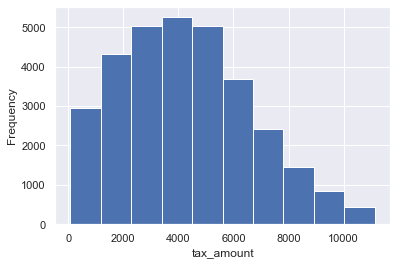

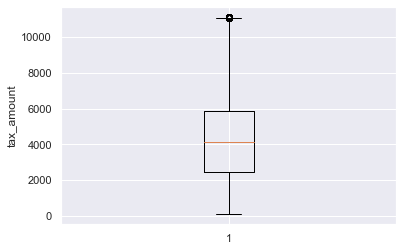

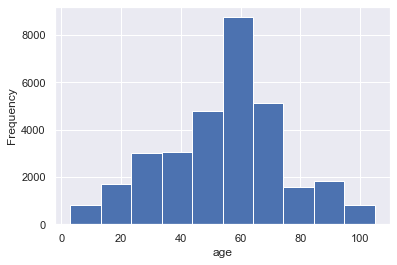

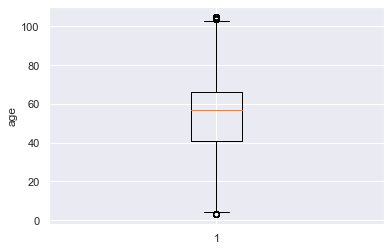

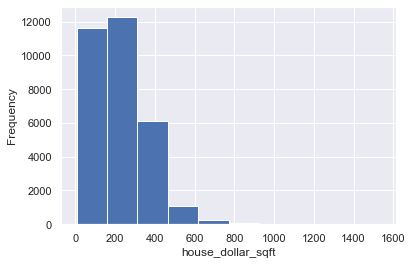

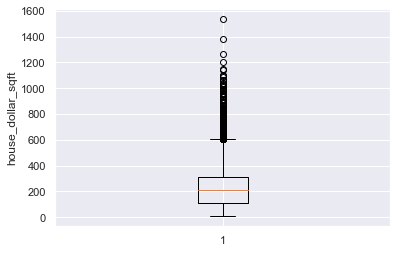

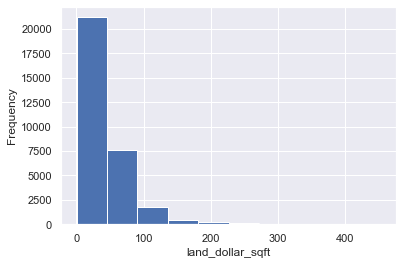

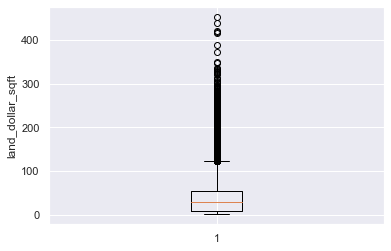

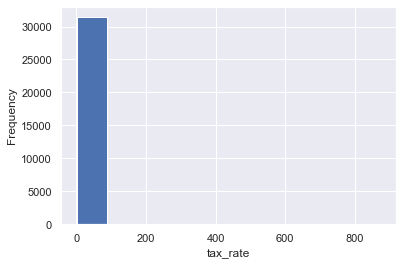

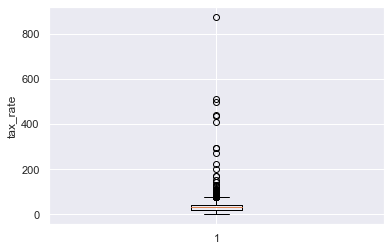

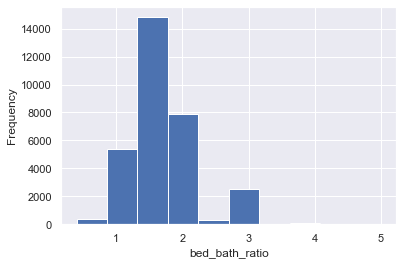

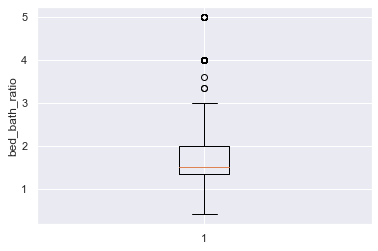

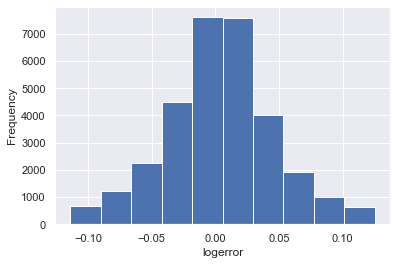

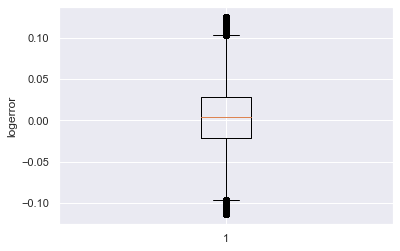

In [13]:
#loop through this list to view distributions of numeric columns
for cat in second_corrs:
    df[cat].hist()
    plt.xlabel(cat)
    plt.ylabel('Frequency')
    plt.show();
    plt.boxplot(df[cat])
    plt.ylabel(cat)
    plt.show();

In [ ]:
#generate a list of columns that have minimal outliers
outliers_handled = set(['bathrooms', 'bedrooms', 'full_baths', 'bed_bath_ratio'])

#generate set of all working numeric columns (outliers present)
numeric_columns = set(quant_vars)

#generate a set of columns that still have outliers using set methods
outlier_columns = numeric_columns.difference(outliers_handled)

#convert set to list
outlier_columns = list(outlier_columns)

In [ ]:
outlier_columns

In [ ]:
for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

### Explore Q V and VI
##### Do any features correlate with the target variable?

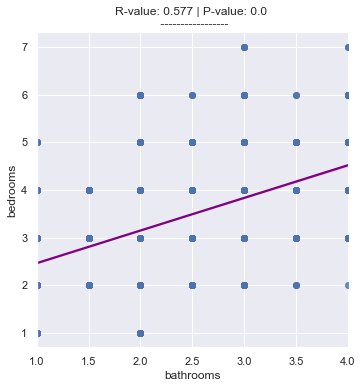

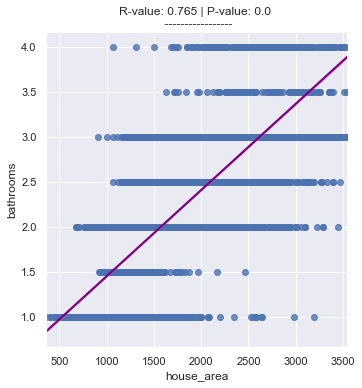

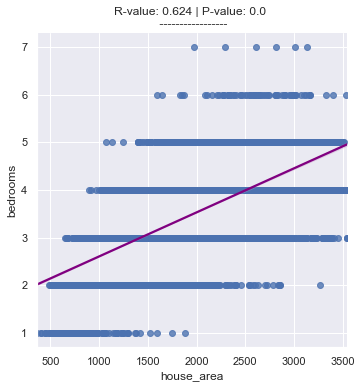

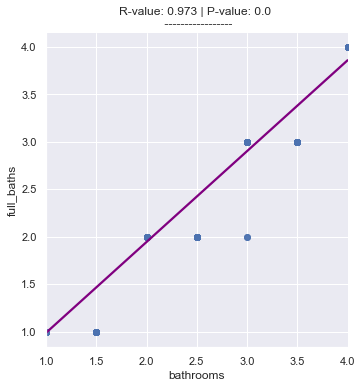

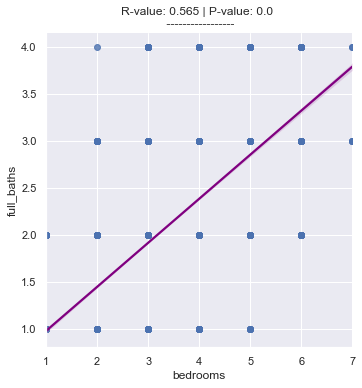

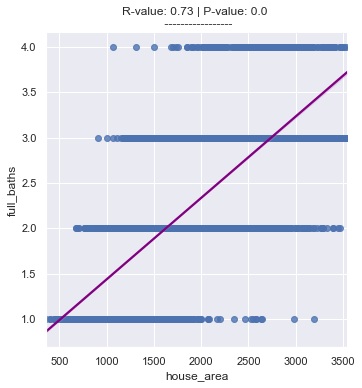

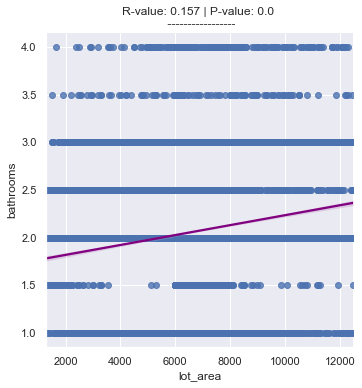

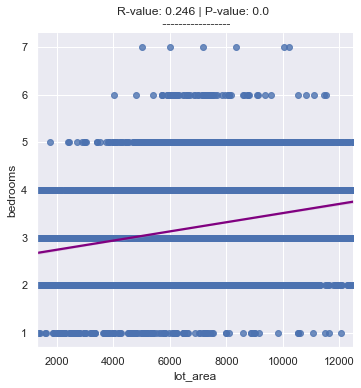

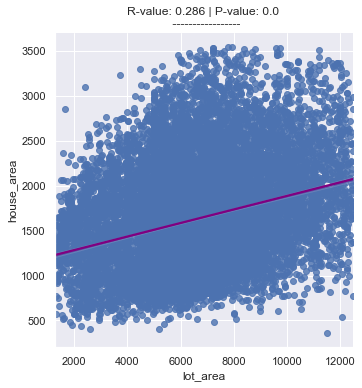

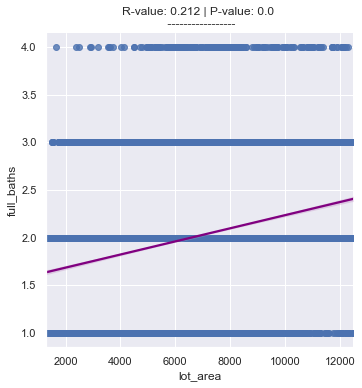

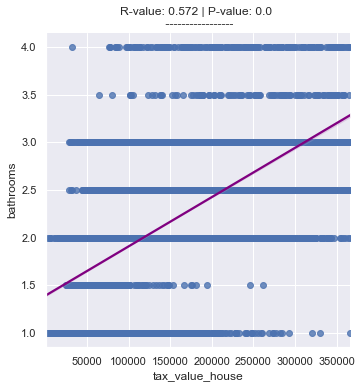

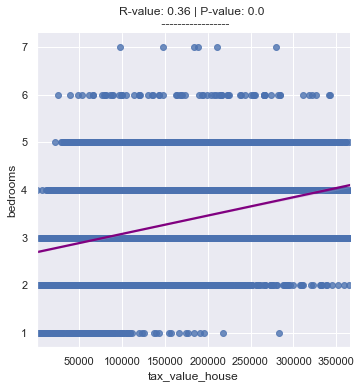

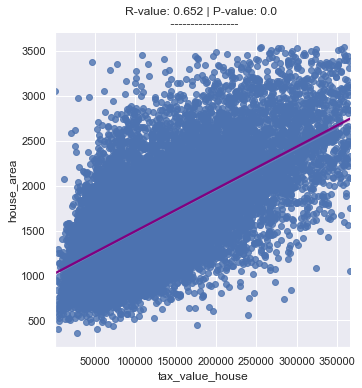

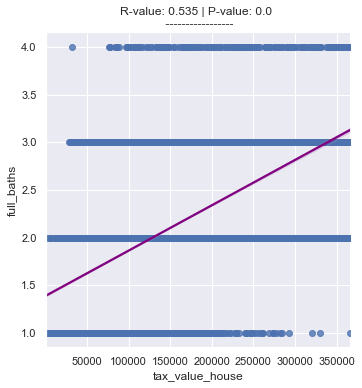

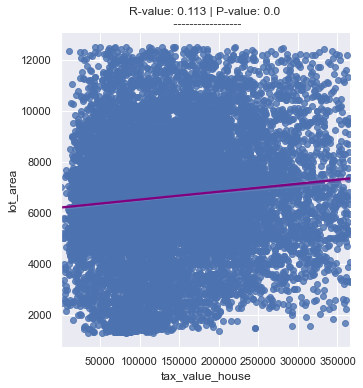

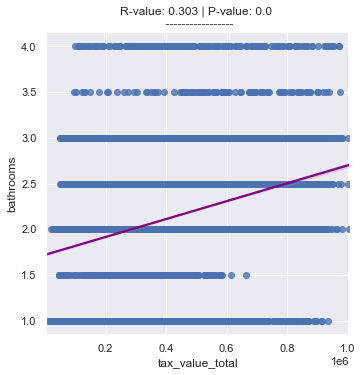

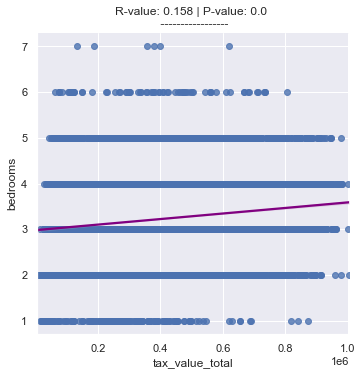

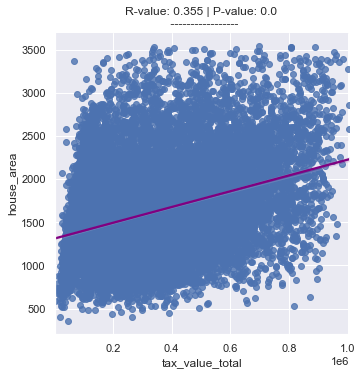

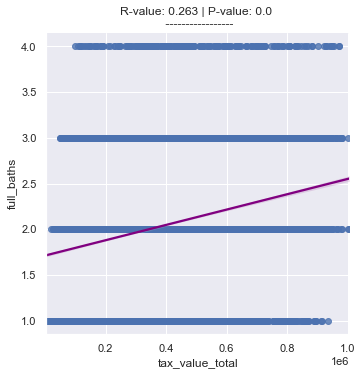

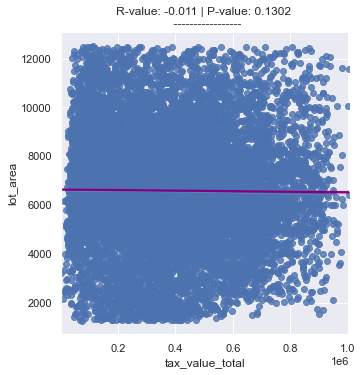

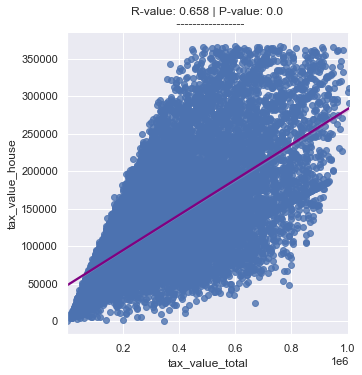

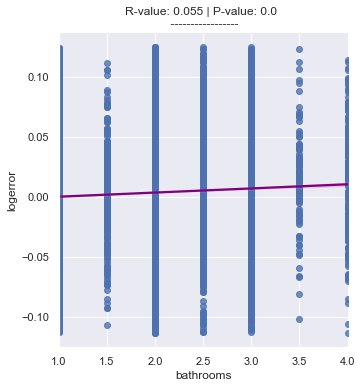

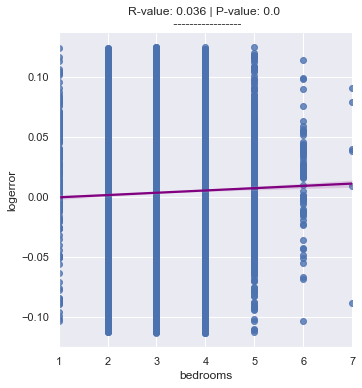

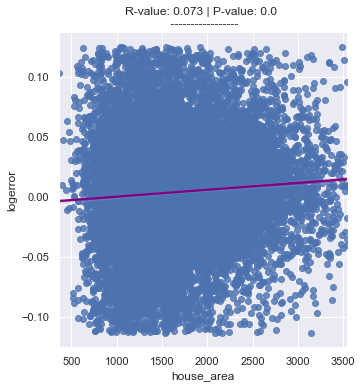

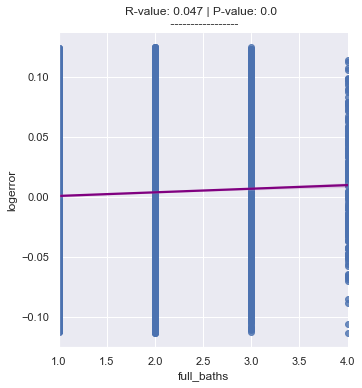

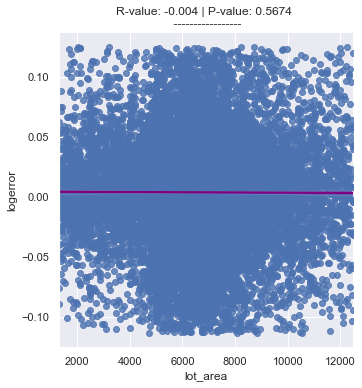

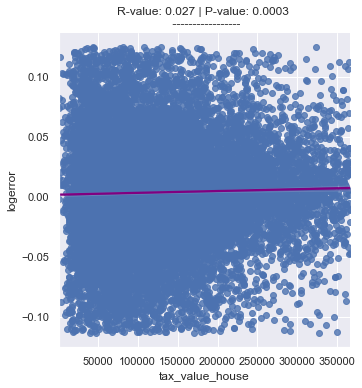

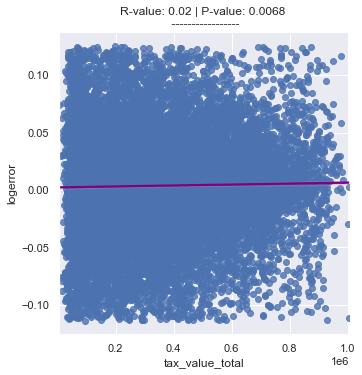

In [14]:
explore.plot_variable_pairs(train, first_corrs)

### Takeaways
* tiny correlation between log error and bathrooms (.055)
* tiny correlation between log error and bedrooms (.036)
* tiny correlation between log error and house area (.073)
* tiny correlation between log error and full baths (.047)
* tiny correlation between log error and house tax value (.027)
* tiny correlation between log error and total tax value (.02)

* lot area does not correlate with log error

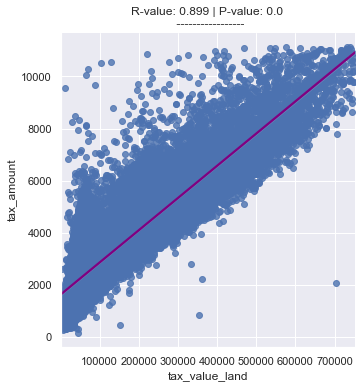

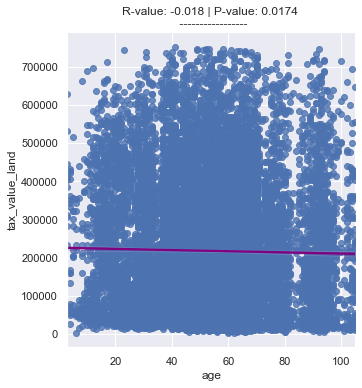

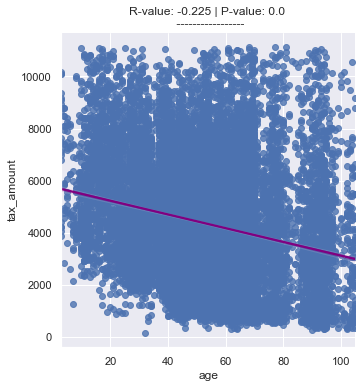

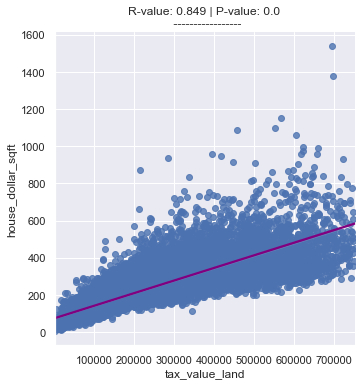

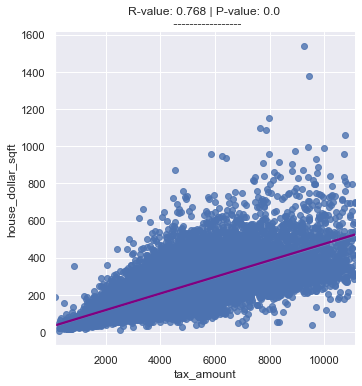

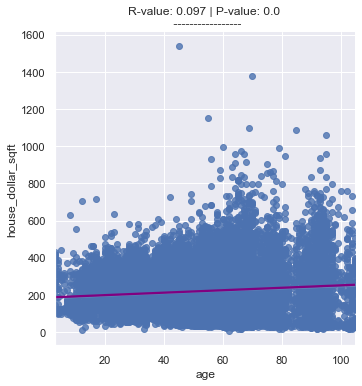

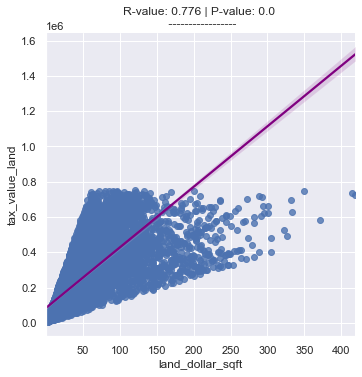

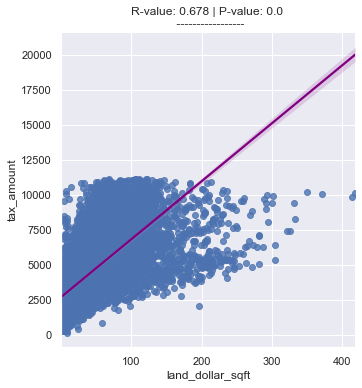

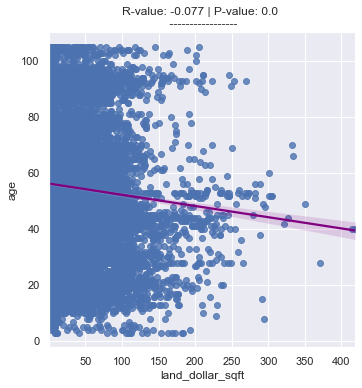

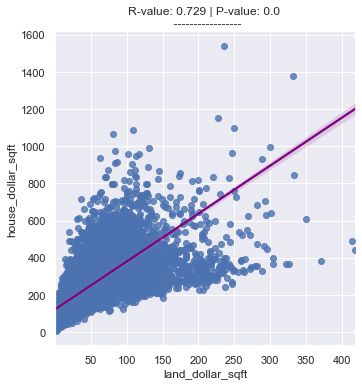

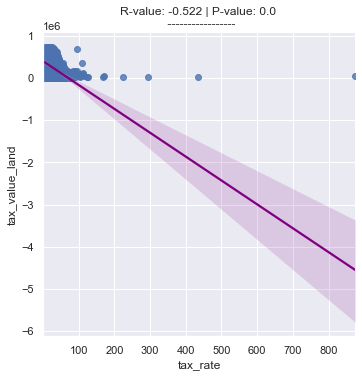

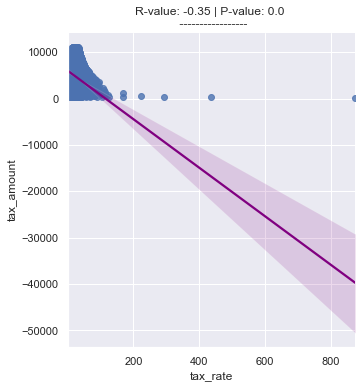

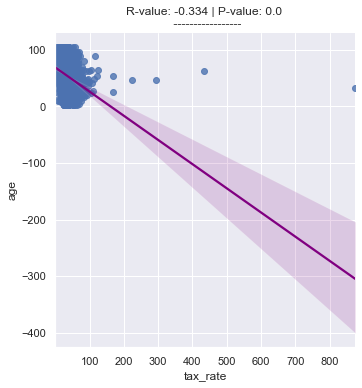

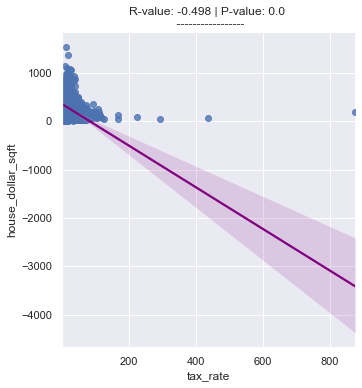

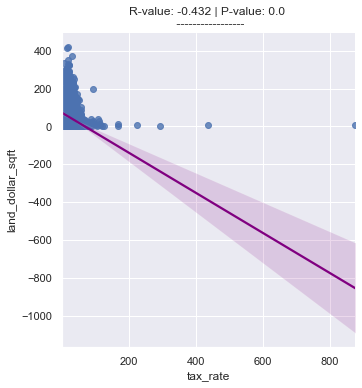

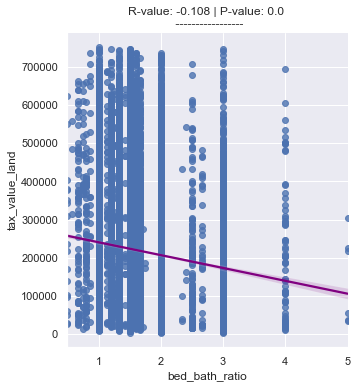

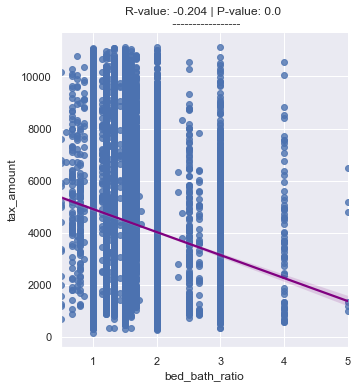

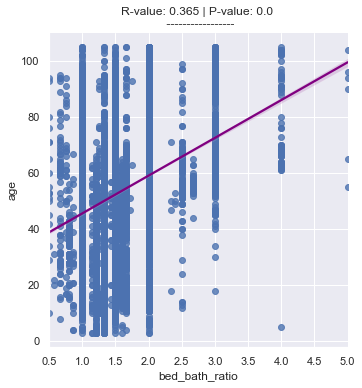

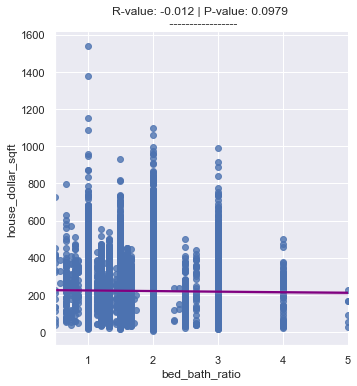

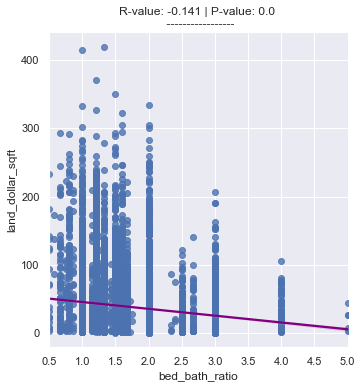

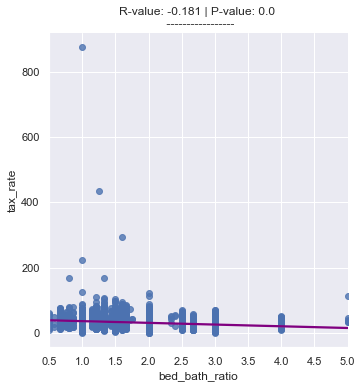

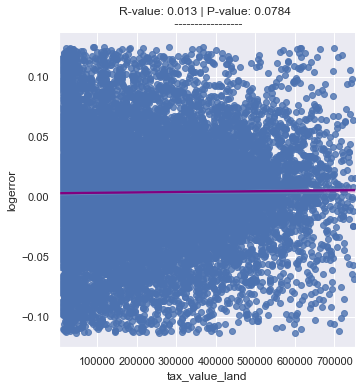

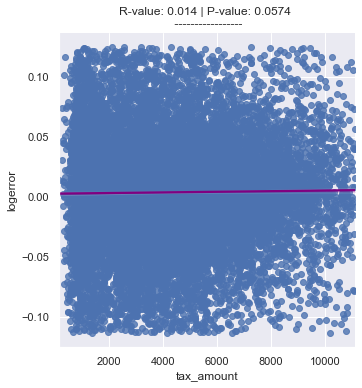

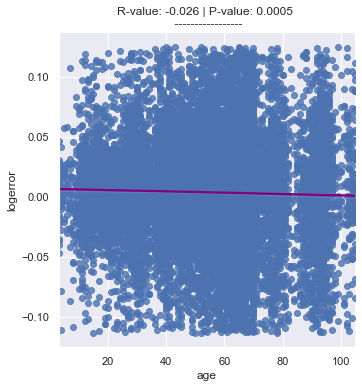

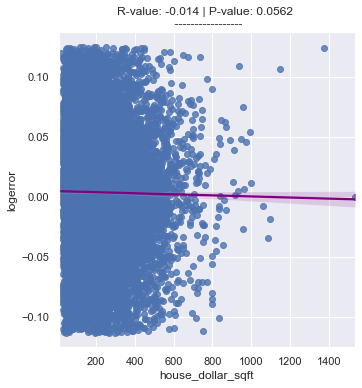

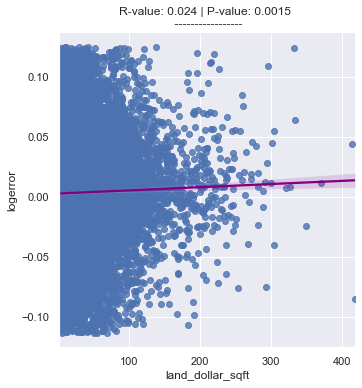

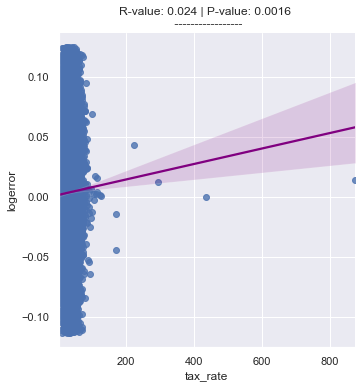

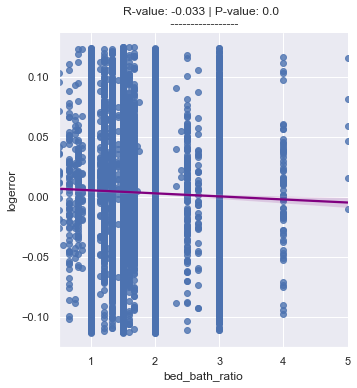

In [15]:
explore.plot_variable_pairs(train, second_corrs)

### Takeaways
* tiny negative correlation between age and log error (-0.026)
* tiny negative correlation between house dollars/sqft and log error (-0.014)
* tiny correlation between land dollars/sqft and log error (.024)
* tiny correlation between tax rate and log error (.024)
* tiny negative correlation between bed/bath ratio and log error (-0.033)

### Explore Q II
#### Do any of the counties have greater log error?

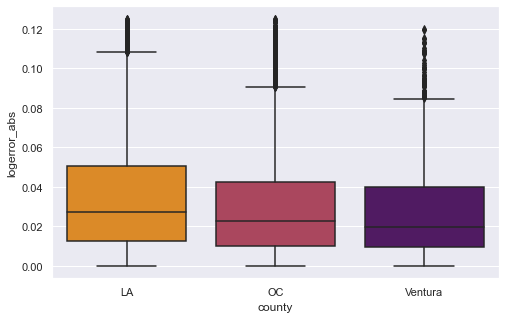

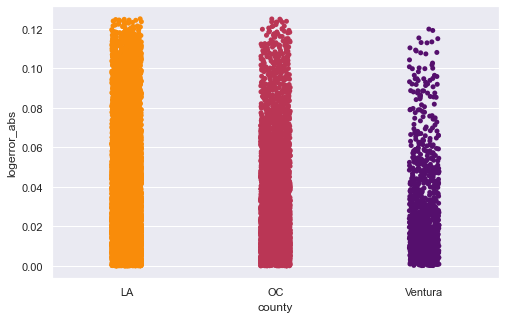

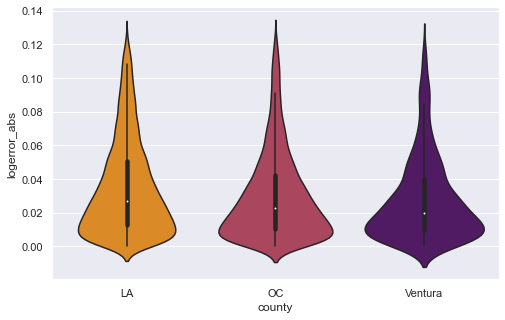

In [20]:
explore.plot_categorical_and_continuous(train, 'county', 'logerror_abs')

In [21]:
#assign variables to respective county data
LA = train[train.county == 'LA']
OC = train[train.county == 'OC']
ventura = train[train.county == 'Ventura']

In [26]:
#juxtapose average log error across counties
LA.logerror_abs.mean(), OC.logerror_abs.mean(), ventura.logerror_abs.mean()

(0.03491046831103464, 0.030034088882666666, 0.027811853180857396)

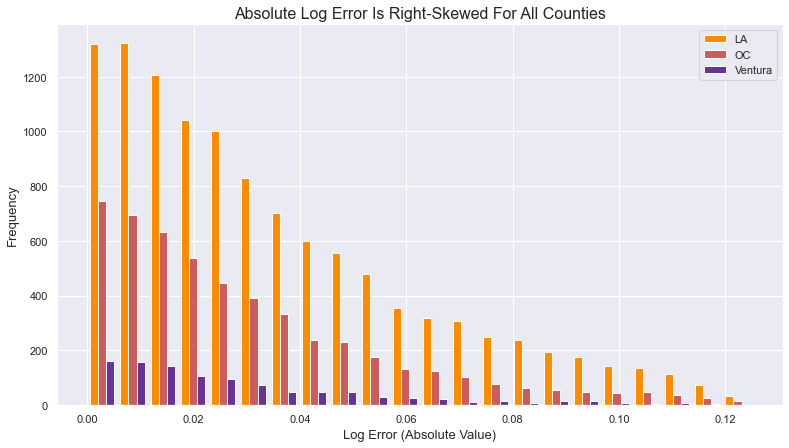

In [29]:
#visualize distribution target variable across different counties
plt.figure(figsize = (13, 7))
plt.hist([LA.logerror_abs, OC.logerror_abs, ventura.logerror_abs],
         label = ['LA', 'OC', 'Ventura'],
         color = ['darkorange', 'indianred', 'rebeccapurple'],
         bins = 22
        )
plt.legend()
plt.title('Absolute Log Error Is Right-Skewed For All Counties', size = 16, pad = 6)
plt.xlabel('Log Error (Absolute Value)', size = 13)
plt.ylabel('Frequency', size = 13);

It looks like log error is the highest in LA county. Is this a significant difference?

Assumptions for T-Test:
* X Normality - an abdunance of observations means this assumption is met (central limit theorem) 
* X Independent observations - log error in one county is not dependent on the log error from another county
* Equal variances - will test for equal variances

In [30]:
#juxtapose county logerror variances
LA.logerror_abs.var(), OC.logerror_abs.var(), ventura.logerror_abs.var()

(0.0008034207055430662, 0.0006828615551697835, 0.0006216261565690539)

Variances at a glance seem the same.

In [35]:
#run levene's to test for homoscedasticity
stats.levene(LA.logerror_abs, OC.logerror_abs)

LeveneResult(statistic=63.97948915777188, pvalue=1.339623071554423e-15)

Low p-value indicates I can reject the null hypothesis that the variances are the same. OC and Ventura also seem the same, but let's test just to be sure.

In [38]:
#run levene's 
stats.levene(OC.logerror_abs, ventura.logerror_abs)

LeveneResult(statistic=3.546248588380879, pvalue=0.059726863609449496)

I fail to reject the null hypothesis that the variances are the same. Let's run some tests

#### Null hypothesis: LA county's log error is the same or less as Orange County's log error.
#### Alternate hypothesis: LA county's log error is greater than Orange County's log error.

In [41]:
#run a t-test between the log error populations for LA and OC
stats.ttest_ind(LA.logerror_abs, OC.logerror_abs, equal_var = False, alternative = 'greater')

Ttest_indResult(statistic=10.843945701718907, pvalue=1.4713490469609616e-27)

#### With a positive t-statistic and a low p-value, I can confidently reject the null hypothesis that LA county's log error is the same or less as OC's. LA's log error is signficantly greater.

Let's run a test between OC and Ventura.

#### Null hypothesis: OC's log error is the same or less as Ventura's log error.
#### Alternate hypothesis: OC's log error is greater than Ventura's log error.

In [42]:
#run test between log error populations of OC and Ventura County.
stats.ttest_ind(OC.logerror_abs, ventura.logerror_abs, alternative = 'greater')

Ttest_indResult(statistic=2.5177529359815893, pvalue=0.0059177647198305604)

#### I can confidently reject the null hypothesis that OC's log error is the same or less as Ventura County's. OC has significantly greater log error.

In [ ]:
#visualize distribution of target variable across popular heat systems
plt.figure(figsize = (13, 7))
plt.hist([heat2_log, heat6_log, heat7_log],
         label = ['Central', 'Forced Air', 'Floor/ Wall'],
         color = ['darkgrey', 'limegreen', 'darkcyan'],
         bins = 15
        )
plt.legend()
plt.title('Log Error for Popular Heating Systems is Normally Distributed Enough', size = 16, pad = 7)
plt.xlabel('Log Error')
plt.ylabel('Frequency');

## Context
- After Wrangle, 

## Initital Questions
- Do any of the counties have on average greater log error?
- Which tax rate has the most log error?
- What combination of bedroom and bathroom has the most log error?
- Is there a range of home values that has the most log error?
- Does log error correlate to house size?
- Does log error correlate to lot size?

## Question 1: ???

## Statistical Testing

## Exploration Summary
### Take Away:
- ???

<hr style="border:2px solid blue"> </hr>

# Clustering

<hr style="border:2px solid blue"> </hr>

# Modeling

## Scaling & Feature Engineering

In [ ]:
X_train, X_validate, X_test, y_train, y_validate, y_test, X_train_scaled, X_validate_scaled, X_test_scaled, skb_feature, rfe_feature = prepare.wrangle(train, validate, test)

### MinMax to Scale

### Select K Best and Recursive Feature Elimination (RFE) to Select 3 Best Features

In [ ]:
skb_feature

In [ ]:
rfe_feature

###  Select K Best chose: House Area, Year Built, and Bathrooms

### RFE chose: House Area, Lattitude, and Longitude

### Powers Combined: House Area, Latitude, Longitude, Year Built, Bathrooms, County, 

# Modeling
-  Foward with 10 Features: House Area, Year Built, Bedrooms, Bathrooms, FIPS, Zipcode, Lot Size, Lattitude, Longitude 
- Experimented with features with no improvement

### Model 0: Baseline = Mean

### Model 1: Linear Regression

### Model 2: LassoLars with Alpha = .01

### Model 3: TweedieRegressor set for Poisson Distribution and Alpha = .01

### Model 4: Polynomial Regressor with Degree = 2 and Alpha = .01

In [ ]:
metric_df, X_test_degree2, lm2, y_test, y_validate = modeling.metric(y_train, y_validate, y_test,X_train_scaled, X_validate_scaled, X_test_scaled)

In [ ]:
metric_df

## Results:
- Polynomial Regressor Performed the Best: 209K RMSE (48K from Baseline / 18K from other models)
- Others Performd the Same: 217K RMSE

# Visualize Predictions:

### Plot Actual vs. Predicted House Values

In [ ]:
import viz

In [ ]:
viz.viz_1(y_validate)

## Note: Model Needs Improvement. Points Do Not Follow Ideal Line

### Plot Distribution of Actual vs. Predicted House Values

In [ ]:
viz.viz_2(y_validate)

## Note: Model Needs Improvement. Prediction Distribution Misses Actuals

### Plot Residuals of Predicted House Values

In [ ]:
viz.viz_3(y_validate)

## Note: Model Needs Improvement. Residuals Form a Trend

# Final Test Using Polynomial Model

In [ ]:
rmse_test = modeling.poly_final(y_test, X_test_degree2, lm2)

In [ ]:
rmse_test

## Results: Polynomial Model has 18M RMSE
- But There is Hope!!!

# Conclusion

## Summary

### Project Goal
- Create a Model that predicts house tax assessment value
    - Sort of..
- Create new features to model.
    - Next Steps
- Find ways to make a better model for Zillow.
    - The Polynomial Model works but...

Take Aways:
- Los Angeles has significantly more houses than the other countied and on average they are valued less
    - Subgrouping by county will improve model results
- Highest valued houses are along the coast, some in Los Angeles County, some in Orange County
    - Subgrouping by coorindates will improve model results

## Recommendations
- Model Not Ready...More Time
- Need More Features
- Keep Features: House Size, Location, County

## Next Steps
- With more time, I would add more features, feature engineering, and subgroup by county or coordinates
- There's hope!!!

### Thank You!!!